# Using K-Means in Python

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data={
    'x':[1,2,2,1,3,6,7,6,7,6,2,7,8,6,7,3,8,8,8],
    'y':[1,2,3,4,3,7,8,8,6,9,5,8,9,7,8,1,4,6,9]
    }
df=pd.DataFrame(data)
df

,x,y
0,1,1
1,2,2
2,2,3
3,1,4
4,3,37
5,6,8
6,7,8
7,6,6
8,7,9
9,6,5


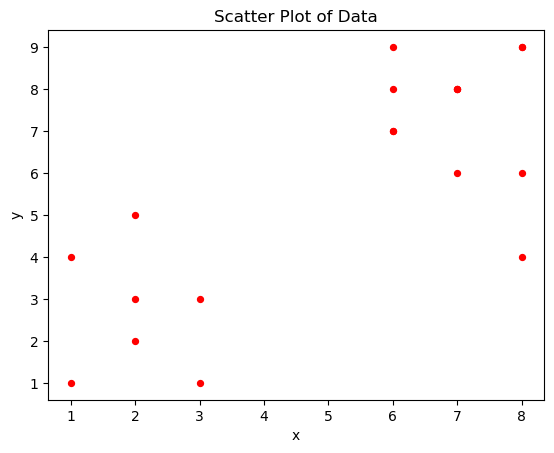

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'x': [1,2,2,1,3,6,7,6,7,6,2,7,8,6,7,3,8,8,8],
    'y': [1,2,3,4,3,7,8,8,6,9,5,8,9,7,8,1,4,6,9]
}

df = pd.DataFrame(data)

# Scatter plot
plt.scatter(df['x'], df['y'], c='r', s=18)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
plt.show()

[[2. 8.]
 [3. 4.]
 [5. 2.]]


Text(0, 0.5, 'y')

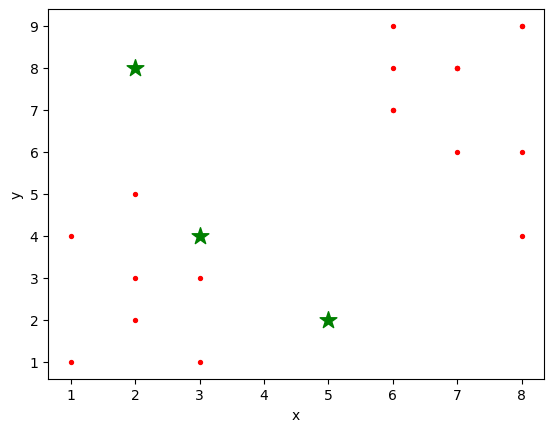

In [11]:
#---let k assume a value---
k = 3

#---create a matrix containing all points---
X = np.array(list(zip(df['x'],df['y'])))

#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)

#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)

#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

## K-Means Algorithm

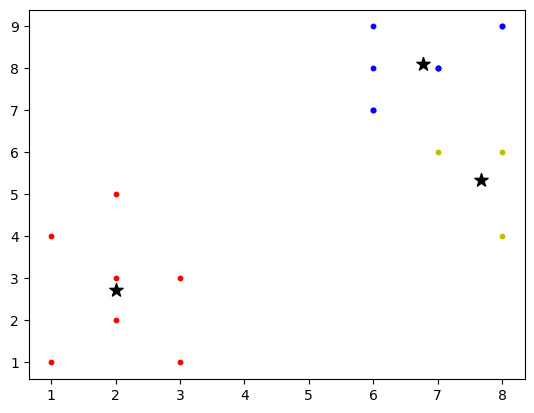

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# ---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# ---create a matrix of 0 with the same dimension as C (centroids)---
C_prev = np.zeros(C.shape)

# ---to store the cluster each point belongs to---
clusters = np.zeros(len(X))

# ---C is the random centroids and C_prev is all 0s---
# ---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)

# ---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    
    # ---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
        
        # ---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters[i] = cluster

    # ---store the prev centroids---
    C_prev = deepcopy(C)

    # ---find the new centroids by taking the average value---
    for i in range(k):  # ---k is the number of clusters---
        # ---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)

    # ---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)

# ---plot the scatter plot---
colors = ['b', 'r', 'y', 'g', 'c', 'm']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
        # this means that one of the clusters has no points
        print("Please regenerate your centroids again.")

plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')
plt.show()

In [16]:
for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]), "Cluster " + str(int(cluster)))

Point [1 1] Cluster 1
Point [2 2] Cluster 1
Point [2 3] Cluster 1
Point [1 4] Cluster 1
Point [3 3] Cluster 1
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [6 8] Cluster 0
Point [7 6] Cluster 2
Point [6 9] Cluster 0
Point [2 5] Cluster 1
Point [7 8] Cluster 0
Point [8 9] Cluster 0
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [3 1] Cluster 1
Point [8 4] Cluster 2
Point [8 6] Cluster 2
Point [8 9] Cluster 0


In [17]:
print(C)

[[6.77777778 8.11111111]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


# Using K-Means ic Scikit Learn

In [28]:
#---using sci-kit-learn---
import warnings
from sklearn.cluster import KMeans

# Ignore FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)

# training the model
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[0 0 0 0 0 1 1 1 2 1 0 1 1 1 1 0 2 2 1]
[[2.         2.71428571]
 [6.77777778 8.11111111]
 [7.66666667 5.33333333]]


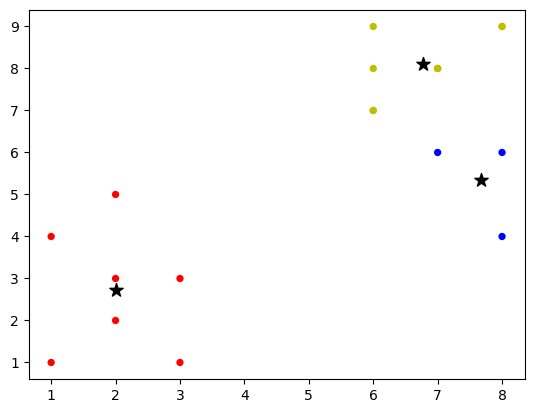

In [21]:
# plot the centroid on a scatter plot

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

In [22]:
# Evaluation

#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster]) 
cluster = kmeans.predict([[7,5]])[0]
print(c[cluster]) 

r
b


## Using Sihouette Coefficient

In [23]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5578051985195768


In [24]:
# Average Sihouette Coefficient
print("Silhouette mean:", metrics.silhouette_score(X, kmeans.labels_))

Silhouette mean: 0.5578051985195768


# Finding Optimal K

Silhouette Coefficients for k = 2 is 0.6897112069939448
Silhouette Coefficients for k = 3 is 0.5578051985195768
Silhouette Coefficients for k = 4 is 0.4430381814640289
Silhouette Coefficients for k = 5 is 0.4424248576948773
Silhouette Coefficients for k = 6 is 0.4202812803017777
Silhouette Coefficients for k = 7 is 0.38650416544593347
Silhouette Coefficients for k = 8 is 0.459039364508135
Silhouette Coefficients for k = 9 is 0.44437330649476303
Silhouette Coefficients for k = 10 is 0.5045189355982561
Silhouette Coefficients for k = 11 is 0.4695564671186216
Silhouette Coefficients for k = 12 is 0.4409831398126504
Silhouette Coefficients for k = 13 is 0.4255677072435213
Silhouette Coefficients for k = 14 is 0.383836485200708
Silhouette Coefficients for k = 15 is 0.3684210526315789
Silhouette Coefficients for k = 16 is 0.3684210526315789
Silhouette Coefficients for k = 17 is 0.3684210526315789
Silhouette Coefficients for k = 18 is 0.3684210526315789
Optimal K is 2


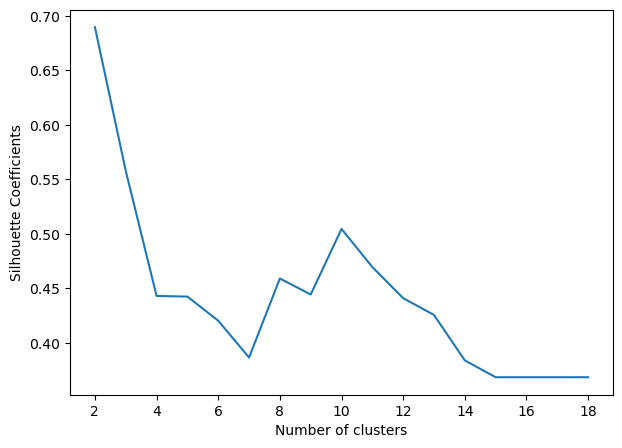

In [27]:
import warnings
from sklearn.cluster import KMeans

# Ignore FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

silhouette_avgs = []
min_k = 2

# ---try k from 2 to the maximum number of labels---
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

# ---plotting the Silhouette Coefficients---
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

# ---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)